<?xml version="1.0" encoding="UTF-8"?>
<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://www.uvv.br/wp-content/themes/uvvBr/templates/assets//img/logouvv.svg" alt="UVV-LOGO" style = width="100px"; height="100px">
        </CENTER>    
        <CENTER><b>Projeto e Análise de Algoritmos</b><br/>
        <CENTER><b>Introdução ao Projeto e a Análise de Algoritmos</b></CENTER><br/>

# Unidade I - Introdução a Projeto e Análise de Algoritmos

## **TRABALHO 2** - Caixeiro-Viajante

### Modelagem do Problema:
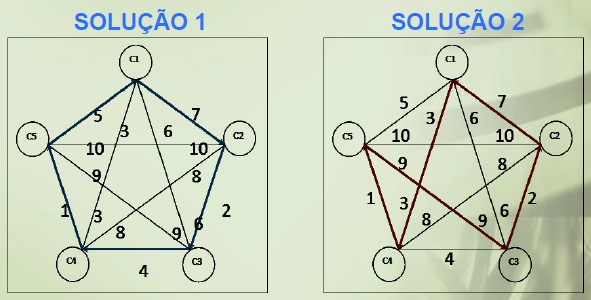

**IMPLEMENTAR:** A solução do problema usando a **Estratégia Gananciosa (SOLUÇÃO 2 ACIMA)** (começar pela minicípio indicado pelo professor)

In [192]:
!pip install ortools

In [193]:
from __future__ import print_function
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


# Criando os dados

In [194]:
def create_data_model():
    data = {}
    data['distance_matrix'] = [
        [0, 453, 379, 157, 116, 389, 148, 218, 227, 137, 304, 420, 445, 230, 95, 120, 140, 92, 279, 396, 70, 179, 102, 208, 478, 198, 359, 181, 157, 108, 214, 164, 123, 143, 251, 163, 240, 131, 345, 137, 223, 38, 279, 423, 164, 95, 293, 170, 474, 492, 120, 152, 418, 355, 411, 430, 139, 496, 167, 321, 139, 173, 208, 224, 352, 373, 216, 362, 258, 170, 302, 91, 53, 129, 448, 400, 153, 145],
        [453, 0, 74, 506, 392, 181, 382, 515, 253, 462, 218, 33, 122, 529, 460, 444, 314, 456, 174, 197, 435, 543, 357, 556, 77, 255, 136, 529, 356, 473, 239, 528, 400, 507, 266, 424, 277, 496, 202, 486, 230, 491, 220, 215, 420, 361, 200, 485, 184, 202, 484, 478, 96, 147, 200, 140, 393, 206, 462, 175, 419, 300, 266, 240, 101, 117, 543, 165, 206, 283, 222, 433, 417, 335, 66, 144, 312, 308],
        [379, 74, 0, 432, 318, 108, 309, 441, 179, 389, 145, 41, 116, 455, 386, 370, 241, 383, 101, 187, 361, 470, 284, 483, 99, 181, 63, 455, 282, 399, 166, 455, 326, 433, 192, 350, 204, 422, 192, 412, 157, 417, 147, 141, 347, 288, 126, 412, 177, 195, 411, 404, 89, 73, 194, 133, 319, 200, 389, 101, 345, 227, 192, 166, 27, 44, 469, 155, 132, 209, 170, 359, 344, 261, 88, 70, 239, 235],
        [157, 506, 432, 0, 138, 442, 131, 88, 280, 70, 360, 473, 498, 74, 97, 64, 195, 65, 332, 449, 102, 42, 171, 52, 531, 251, 412, 24, 155, 99, 267, 45, 106, 95, 306, 113, 295, 79, 398, 20, 276, 195, 332, 476, 117, 163, 346, 102, 527, 545, 47, 85, 471, 408, 464, 483, 122, 549, 110, 374, 89, 229, 263, 277, 405, 426, 60, 415, 311, 223, 355, 81, 104, 174, 501, 453, 194, 200],
        [116, 392, 318, 138, 0, 328, 33, 147, 166, 94, 245, 359, 384, 161, 123, 76, 81, 113, 218, 335, 98, 179, 57, 188, 417, 137, 298, 161, 40, 136, 153, 182, 32, 170, 192, 65, 181, 159, 284, 118, 162, 154, 218, 362, 62, 49, 232, 117, 413, 431, 147, 110, 357, 293, 350, 369, 34, 435, 96, 260, 51, 114, 149, 163, 291, 312, 174, 300, 196, 109, 240, 65, 81, 59, 387, 338, 80, 86],
        [389, 181, 108, 442, 328, 0, 319, 451, 189, 399, 154, 149, 173, 465, 396, 380, 250, 393, 110, 244, 371, 479, 293, 492, 206, 191, 97, 465, 292, 409, 175, 465, 336, 443, 202, 360, 213, 432, 248, 422, 166, 427, 182, 34, 357, 297, 136, 422, 235, 253, 420, 414, 146, 35, 251, 190, 329, 257, 399, 136, 355, 237, 202, 176, 80, 101, 479, 212, 142, 219, 204, 369, 354, 271, 176, 128, 248, 244],
        [148, 382, 309, 131, 33, 319, 0, 140, 156, 87, 243, 350, 374, 154, 154, 69, 78, 106, 209, 326, 129, 172, 90, 181, 408, 127, 289, 154, 27, 167, 143, 175, 25, 201, 190, 41, 178, 190, 275, 111, 152, 185, 208, 352, 38, 82, 223, 110, 403, 421, 163, 103, 347, 284, 340, 359, 10, 426, 80, 250, 44, 112, 146, 153, 281, 302, 168, 291, 187, 99, 231, 58, 112, 57, 377, 329, 70, 78],
        [218, 515, 441, 88, 147, 451, 140, 0, 289, 80, 368, 482, 507, 14, 184, 98, 204, 125, 341, 458, 163, 105, 203, 86, 540, 260, 421, 64, 163, 164, 276, 108, 115, 158, 315, 108, 304, 142, 407, 106, 285, 255, 340, 485, 113, 196, 355, 59, 536, 554, 133, 77, 480, 416, 473, 491, 131, 558, 92, 383, 98, 237, 272, 286, 414, 435, 28, 423, 319, 232, 363, 127, 165, 182, 510, 461, 203, 209],
        [227, 253, 179, 280, 166, 189, 156, 289, 0, 236, 127, 220, 228, 303, 233, 218, 88, 230, 79, 177, 208, 317, 131, 330, 278, 29, 140, 303, 129, 246, 14, 302, 173, 281, 110, 197, 99, 269, 126, 260, 23, 265, 60, 223, 194, 135, 93, 259, 255, 273, 258, 251, 208, 154, 192, 211, 167, 277, 236, 102, 192, 119, 85, 54, 152, 173, 316, 142, 88, 57, 82, 207, 191, 108, 238, 199, 86, 82],
        [137, 462, 389, 70, 94, 399, 87, 80, 236, 0, 316, 430, 454, 95, 118, 19, 151, 45, 289, 406, 82, 111, 149, 120, 488, 207, 369, 93, 111, 131, 223, 113, 63, 163, 263, 57, 251, 147, 355, 50, 232, 175, 288, 432, 62, 142, 303, 51, 483, 501, 101, 36, 427, 364, 420, 439, 79, 506, 41, 330, 45, 185, 219, 233, 361, 382, 108, 371, 267, 179, 311, 47, 84, 130, 457, 409, 150, 156],
        [304, 218, 145, 360, 245, 154, 243, 368, 127, 316, 0, 186, 210, 382, 311, 297, 168, 308, 48, 241, 286, 395, 209, 410, 243, 129, 134, 383, 217, 324, 113, 380, 253, 358, 53, 284, 65, 347, 190, 339, 104, 342, 124, 188, 281, 212, 73, 339, 272, 290, 336, 331, 183, 120, 256, 227, 253, 294, 318, 155, 272, 131, 97, 109, 117, 138, 396, 207, 80, 157, 147, 286, 269, 186, 213, 165, 186, 182],
        [420, 33, 41, 473, 359, 149, 350, 482, 220, 430, 186, 0, 104, 496, 427, 411, 282, 424, 142, 178, 402, 511, 325, 524, 58, 222, 104, 496, 323, 440, 207, 496, 367, 474, 233, 391, 245, 463, 183, 453, 198, 458, 188, 182, 388, 329, 167, 453, 165, 183, 452, 445, 77, 114, 182, 121, 360, 187, 430, 142, 386, 268, 233, 207, 68, 85, 510, 146, 173, 250, 203, 400, 385, 302, 47, 111, 280, 276],
        [445, 122, 116, 498, 384, 173, 374, 507, 228, 454, 210, 104, 0, 521, 452, 436, 306, 448, 166, 88, 427, 535, 349, 548, 121, 247, 128, 521, 348, 465, 231, 520, 392, 499, 258, 416, 269, 488, 126, 478, 222, 483, 169, 207, 412, 353, 192, 477, 63, 81, 476, 470, 27, 138, 79, 18, 385, 85, 454, 167, 411, 292, 258, 232, 93, 72, 535, 89, 198, 275, 146, 425, 409, 327, 56, 99, 304, 300],
        [230, 529, 455, 74, 161, 465, 154, 14, 303, 95, 382, 496, 521, 0, 170, 112, 218, 138, 355, 472, 175, 91, 217, 72, 554, 274, 435, 50, 177, 150, 290, 94, 129, 144, 329, 122, 318, 128, 421, 92, 299, 268, 354, 499, 127, 210, 369, 73, 550, 568, 119, 91, 494, 430, 487, 505, 145, 572, 106, 397, 112, 251, 286, 300, 428, 449, 14, 437, 333, 246, 377, 141, 177, 196, 524, 475, 217, 223],
        [95, 460, 386, 97, 123, 396, 154, 184, 233, 118, 311, 427, 452, 170, 0, 112, 147, 73, 286, 403, 36, 109, 109, 147, 485, 204, 366, 120, 163, 39, 220, 94, 129, 73, 258, 161, 246, 62, 352, 102, 229, 133, 285, 429, 165, 101, 300, 151, 481, 499, 50, 134, 424, 361, 418, 436, 146, 503, 158, 328, 137, 180, 214, 230, 359, 380, 156, 368, 264, 177, 308, 97, 42, 135, 455, 406, 159, 151],
        [120, 444, 370, 64, 76, 380, 69, 98, 218, 19, 297, 411, 436, 112, 112, 0, 133, 39, 270, 387, 76, 104, 131, 114, 469, 189, 350, 87, 92, 125, 205, 107, 44, 157, 244, 50, 233, 141, 336, 43, 214, 158, 270, 414, 54, 123, 284, 52, 465, 483, 95, 35, 409, 345, 402, 421, 60, 487, 48, 312, 27, 166, 201, 215, 343, 364, 122, 353, 249, 161, 293, 29, 78, 112, 439, 391, 132, 138],
        [140, 314, 241, 195, 81, 250, 78, 204, 88, 151, 168, 282, 306, 218, 147, 133, 0, 143, 140, 257, 122, 230, 44, 245, 339, 59, 220, 218, 53, 160, 75, 215, 89, 194, 115, 120, 104, 183, 206, 175, 84, 178, 140, 284, 116, 48, 154, 174, 335, 353, 171, 167, 279, 216, 272, 291, 89, 358, 153, 182, 108, 37, 72, 85, 213, 234, 232, 223, 119, 31, 163, 122, 104, 22, 309, 261, 25, 17],
        [92, 456, 383, 65, 113, 393, 106, 125, 230, 45, 308, 424, 448, 138, 73, 39, 143, 0, 283, 400, 37, 106, 106, 115, 482, 201, 363, 88, 130, 86, 217, 109, 82, 120, 255, 88, 243, 109, 349, 45, 226, 130, 282, 426, 92, 98, 297, 78, 477, 495, 97, 60, 421, 358, 414, 433, 98, 500, 85, 324, 64, 177, 211, 227, 355, 376, 124, 365, 261, 173, 305, 56, 39, 132, 451, 403, 156, 148],
        [279, 174, 101, 332, 218, 110, 209, 341, 79, 289, 48, 142, 166, 355, 286, 270, 140, 283, 0, 195, 261, 370, 184, 383, 200, 81, 91, 355, 182, 299, 66, 355, 226, 333, 96, 250, 106, 322, 144, 312, 57, 317, 77, 144, 247, 188, 27, 312, 228, 246, 311, 304, 139, 76, 210, 183, 219, 250, 289, 108, 245, 126, 92, 65, 73, 94, 369, 160, 32, 109, 100, 259, 244, 161, 169, 121, 139, 135],
        [396, 197, 187, 449, 335, 244, 326, 458, 177, 406, 241, 178, 88, 472, 403, 387, 257, 400, 195, 0, 378, 486, 300, 499, 196, 198, 199, 472, 299, 416, 182, 472, 343, 450, 280, 367, 268, 439, 75, 429, 173, 434, 118, 278, 364, 304, 191, 429, 115, 133, 427, 421, 101, 209, 52, 70, 336, 137, 406, 163, 362, 289, 254, 224, 164, 143, 486, 38, 223, 226, 95, 376, 361, 278, 131, 169, 255, 251],
        [70, 435, 361, 102, 98, 371, 129, 163, 208, 82, 286, 402, 427, 175, 36, 76, 122, 37, 261, 378, 0, 120, 84, 153, 460, 180, 341, 125, 138, 49, 195, 105, 105, 83, 233, 125, 221, 72, 327, 82, 205, 108, 260, 405, 129, 76, 275, 115, 456, 474, 61, 97, 400, 336, 393, 411, 121, 478, 122, 303, 101, 155, 189, 206, 334, 355, 161, 343, 239, 152, 283, 73, 17, 110, 430, 381, 134, 126],
        [179, 543, 470, 42, 179, 479, 172, 105, 317, 111, 395, 511, 535, 91, 109, 104, 230, 106, 370, 486, 120, 0, 193, 69, 569, 288, 450, 42, 195, 71, 304, 15, 147, 65, 341, 153, 330, 49, 435, 61, 313, 217, 369, 513, 158, 185, 384, 143, 564, 582, 88, 126, 508, 445, 501, 520, 163, 587, 151, 411, 130, 263, 298, 314, 442, 463, 77, 452, 348, 260, 392, 122, 126, 215, 538, 490, 235, 235],
        [102, 357, 284, 171, 57, 293, 90, 203, 131, 149, 209, 325, 349, 217, 109, 131, 44, 106, 184, 300, 84, 193, 0, 221, 383, 102, 264, 194, 64, 122, 118, 178, 88, 156, 155, 122, 144, 145, 249, 151, 127, 140, 183, 327, 119, 10, 198, 174, 378, 396, 134, 165, 322, 259, 315, 334, 91, 401, 153, 225, 107, 78, 112, 128, 256, 277, 230, 266, 162, 74, 206, 102, 67, 33, 352, 304, 57, 49],
        [208, 556, 483, 52, 188, 492, 181, 86, 330, 120, 410, 524, 548, 72, 147, 114, 245, 115, 383, 499, 153, 69, 221, 0, 582, 301, 463, 28, 205, 127, 317, 72, 157, 122, 356, 163, 345, 106, 448, 70, 326, 245, 382, 526, 167, 213, 397, 145, 577, 595, 97, 135, 521, 458, 514, 533, 173, 600, 160, 424, 139, 279, 313, 327, 455, 476, 58, 465, 361, 273, 405, 131, 155, 224, 551, 503, 244, 250],
        [478, 77, 99, 531, 417, 206, 408, 540, 278, 488, 243, 58, 121, 554, 485, 469, 339, 482, 200, 196, 460, 569, 383, 582, 0, 280, 162, 554, 381, 498, 265, 554, 425, 532, 291, 449, 303, 521, 201, 511, 256, 516, 244, 240, 446, 386, 225, 511, 183, 201, 510, 503, 95, 172, 199, 139, 418, 205, 488, 200, 444, 326, 291, 265, 126, 140, 568, 164, 231, 308, 221, 458, 443, 360, 65, 167, 338, 334],
        [198, 255, 181, 251, 137, 191, 127, 260, 29, 207, 129, 222, 247, 274, 204, 189, 59, 201, 81, 198, 180, 288, 102, 301, 280, 0, 161, 274, 101, 218, 16, 273, 145, 252, 82, 169, 71, 241, 147, 231, 25, 236, 81, 225, 165, 106, 95, 230, 276, 294, 229, 223, 220, 157, 213, 232, 138, 298, 207, 123, 164, 91, 56, 26, 154, 175, 287, 164, 60, 28, 104, 178, 162, 80, 250, 202, 57, 53],
        [359, 136, 63, 412, 298, 97, 289, 421, 140, 369, 134, 104, 128, 435, 366, 350, 220, 363, 91, 199, 341, 450, 264, 463, 162, 161, 0, 435, 262, 379, 146, 435, 306, 413, 182, 330, 194, 402, 151, 392, 137, 397, 84, 131, 327, 268, 116, 392, 190, 208, 391, 384, 101, 63, 206, 145, 299, 212, 369, 38, 325, 217, 182, 156, 35, 56, 449, 167, 122, 189, 107, 339, 324, 241, 131, 83, 219, 215],
        [181, 529, 455, 24, 161, 465, 154, 64, 303, 93, 383, 496, 521, 50, 120, 87, 218, 88, 355, 472, 125, 42, 194, 28, 554, 274, 435, 0, 178, 100, 290, 45, 129, 94, 329, 136, 318, 78, 421, 43, 299, 218, 355, 499, 140, 186, 369, 124, 550, 568, 70, 108, 494, 431, 487, 506, 146, 572, 133, 397, 112, 252, 286, 300, 428, 449, 37, 438, 334, 246, 378, 104, 127, 197, 524, 476, 217, 223],
        [157, 356, 282, 155, 40, 292, 27, 163, 129, 111, 217, 323, 348, 177, 163, 92, 53, 130, 182, 299, 138, 195, 64, 205, 381, 101, 262, 178, 0, 176, 116, 198, 48, 210, 164, 68, 152, 199, 248, 134, 125, 194, 181, 326, 65, 68, 196, 134, 377, 395, 186, 126, 321, 257, 314, 332, 37, 399, 107, 224, 67, 86, 120, 127, 255, 276, 191, 264, 160, 73, 204, 81, 121, 31, 351, 302, 43, 51],
        [108, 473, 399, 99, 136, 409, 167, 164, 246, 131, 324, 440, 465, 150, 39, 125, 160, 86, 299, 416, 49, 71, 122, 127, 498, 218, 379, 100, 176, 0, 233, 56, 143, 34, 271, 174, 259, 23, 365, 103, 242, 146, 298, 443, 178, 114, 313, 164, 494, 512, 52, 147, 438, 374, 431, 449, 159, 516, 172, 341, 151, 193, 227, 244, 372, 393, 136, 381, 277, 190, 321, 111, 55, 148, 468, 419, 172, 164],
        [214, 239, 166, 267, 153, 175, 143, 276, 14, 223, 113, 207, 231, 290, 220, 205, 75, 217, 66, 182, 195, 304, 118, 317, 265, 16, 146, 290, 116, 233, 0, 289, 160, 268, 97, 184, 86, 256, 131, 247, 9, 252, 65, 209, 181, 122, 80, 246, 260, 278, 245, 238, 204, 141, 197, 216, 154, 283, 223, 107, 179, 106, 72, 41, 138, 159, 303, 148, 75, 44, 88, 194, 178, 95, 234, 186, 73, 69],
        [164, 528, 455, 45, 182, 465, 175, 108, 302, 113, 380, 496, 520, 94, 94, 107, 215, 109, 355, 472, 105, 15, 178, 72, 554, 273, 435, 45, 198, 56, 289, 0, 150, 50, 327, 156, 315, 34, 421, 64, 298, 202, 354, 498, 161, 170, 369, 146, 549, 567, 91, 129, 493, 430, 486, 505, 166, 572, 154, 396, 133, 249, 283, 299, 427, 448, 80, 437, 333, 245, 377, 125, 111, 204, 523, 475, 228, 220],
        [123, 400, 326, 106, 32, 336, 25, 115, 173, 63, 253, 367, 392, 129, 129, 44, 89, 82, 226, 343, 105, 147, 88, 157, 425, 145, 306, 129, 48, 143, 160, 150, 0, 177, 200, 40, 189, 166, 292, 86, 169, 161, 225, 370, 41, 80, 240, 86, 421, 439, 138, 78, 365, 301, 358, 376, 16, 443, 65, 268, 19, 122, 157, 171, 299, 320, 143, 308, 204, 117, 248, 33, 87, 67, 395, 346, 87, 94],
        [143, 507, 433, 95, 170, 443, 201, 158, 281, 163, 358, 474, 499, 144, 73, 157, 194, 120, 333, 450, 83, 65, 156, 122, 532, 252, 413, 94, 210, 34, 268, 50, 177, 0, 305, 206, 294, 17, 399, 114, 277, 180, 332, 477, 210, 148, 347, 196, 528, 546, 86, 179, 472, 408, 465, 484, 193, 550, 204, 375, 183, 227, 262, 278, 406, 427, 130, 415, 311, 224, 355, 145, 89, 183, 502, 453, 207, 199],
        [251, 266, 192, 306, 192, 202, 190, 315, 110, 263, 53, 233, 258, 329, 258, 244, 115, 255, 96, 280, 233, 341, 155, 356, 291, 82, 182, 329, 164, 271, 97, 327, 200, 305, 0, 231, 11, 294, 229, 286, 106, 289, 162, 236, 228, 159, 121, 286, 319, 337, 282, 278, 231, 167, 295, 275, 200, 342, 265, 203, 219, 78, 43, 56, 165, 186, 343, 245, 86, 110, 185, 233, 216, 133, 261, 213, 136, 128],
        [163, 424, 350, 113, 65, 360, 41, 108, 197, 57, 284, 391, 416, 122, 161, 50, 120, 88, 250, 367, 125, 153, 122, 163, 449, 169, 330, 136, 68, 174, 184, 156, 40, 206, 231, 0, 220, 190, 316, 93, 194, 201, 249, 394, 4, 114, 264, 79, 445, 463, 144, 84, 389, 325, 382, 400, 31, 467, 42, 292, 29, 153, 188, 195, 323, 344, 136, 332, 228, 141, 272, 73, 127, 98, 419, 370, 111, 120],
        [240, 277, 204, 295, 181, 213, 178, 304, 99, 251, 65, 245, 269, 318, 246, 233, 104, 243, 106, 268, 221, 330, 144, 345, 303, 71, 194, 318, 152, 259, 86, 315, 189, 294, 11, 220, 0, 282, 218, 275, 95, 278, 151, 247, 216, 148, 129, 274, 331, 349, 271, 267, 242, 179, 283, 286, 189, 353, 253, 193, 208, 66, 32, 45, 176, 197, 331, 234, 74, 98, 174, 222, 204, 121, 272, 224, 125, 117],
        [131, 496, 422, 79, 159, 432, 190, 142, 269, 147, 347, 463, 488, 128, 62, 141, 183, 109, 322, 439, 72, 49, 145, 106, 521, 241, 402, 78, 199, 23, 256, 34, 166, 17, 294, 190, 282, 0, 388, 98, 265, 169, 321, 466, 194, 137, 336, 180, 517, 535, 75, 163, 460, 397, 454, 472, 182, 539, 188, 364, 167, 216, 250, 266, 395, 416, 114, 404, 300, 213, 344, 134, 78, 171, 491, 442, 195, 187],
        [345, 202, 192, 398, 284, 248, 275, 407, 126, 355, 190, 183, 126, 421, 352, 336, 206, 349, 144, 75, 327, 435, 249, 448, 201, 147, 151, 421, 248, 365, 131, 421, 292, 399, 229, 316, 218, 388, 0, 378, 122, 383, 67, 282, 313, 253, 140, 378, 153, 171, 376, 370, 106, 213, 90, 108, 285, 175, 355, 112, 311, 238, 203, 173, 169, 148, 435, 40, 172, 175, 44, 325, 310, 227, 136, 175, 204, 201],
        [137, 486, 412, 20, 118, 422, 111, 106, 260, 50, 339, 453, 478, 92, 102, 43, 175, 45, 312, 429, 82, 61, 151, 70, 511, 231, 392, 43, 134, 103, 247, 64, 86, 114, 286, 93, 275, 98, 378, 0, 256, 175, 312, 456, 97, 143, 326, 82, 507, 525, 52, 65, 451, 387, 444, 463, 102, 529, 90, 354, 69, 208, 243, 257, 385, 406, 79, 395, 291, 203, 335, 61, 84, 154, 481, 433, 174, 180],
        [223, 230, 157, 276, 162, 166, 152, 285, 23, 232, 104, 198, 222, 299, 229, 214, 84, 226, 57, 173, 205, 313, 127, 326, 256, 25, 137, 299, 125, 242, 9, 298, 169, 277, 106, 194, 95, 265, 122, 256, 0, 261, 56, 200, 190, 131, 71, 255, 251, 269, 254, 248, 195, 132, 188, 207, 163, 274, 232, 98, 189, 115, 81, 50, 129, 150, 312, 139, 66, 53, 79, 203, 187, 104, 225, 177, 82, 78],
        [38, 491, 417, 195, 154, 427, 185, 255, 265, 175, 342, 458, 483, 268, 133, 158, 178, 130, 317, 434, 108, 217, 140, 245, 516, 236, 397, 218, 194, 146, 252, 202, 161, 180, 289, 201, 278, 169, 383, 175, 261, 0, 316, 461, 202, 132, 331, 208, 512, 530, 158, 190, 456, 392, 449, 468, 177, 534, 205, 359, 176, 211, 246, 262, 390, 411, 254, 399, 295, 208, 339, 129, 91, 167, 486, 437, 191, 183],
        [279, 220, 147, 332, 218, 182, 208, 340, 60, 288, 124, 188, 169, 354, 285, 270, 140, 282, 77, 118, 260, 369, 183, 382, 244, 81, 84, 355, 181, 298, 65, 354, 225, 332, 162, 249, 151, 321, 67, 312, 56, 316, 0, 215, 246, 187, 73, 311, 195, 213, 310, 303, 149, 147, 132, 151, 218, 218, 288, 46, 244, 171, 137, 106, 119, 140, 368, 83, 105, 109, 23, 259, 243, 160, 179, 167, 138, 134],
        [423, 215, 141, 476, 362, 34, 352, 485, 223, 432, 188, 182, 207, 499, 429, 414, 284, 426, 144, 278, 405, 513, 327, 526, 240, 225, 131, 499, 326, 443, 209, 498, 370, 477, 236, 394, 247, 466, 282, 456, 200, 461, 215, 0, 390, 331, 170, 455, 268, 286, 454, 448, 180, 69, 285, 224, 363, 291, 432, 170, 389, 270, 236, 210, 114, 135, 512, 246, 176, 253, 238, 403, 387, 305, 210, 162, 282, 278],
        [164, 420, 347, 117, 62, 357, 38, 113, 194, 62, 281, 388, 412, 127, 165, 54, 116, 92, 247, 364, 129, 158, 119, 167, 446, 165, 327, 140, 65, 178, 181, 161, 41, 210, 228, 4, 216, 194, 313, 97, 190, 202, 246, 390, 0, 111, 261, 83, 441, 459, 148, 88, 385, 322, 378, 397, 28, 464, 42, 288, 30, 150, 184, 191, 319, 340, 140, 329, 225, 137, 269, 75, 129, 95, 415, 367, 108, 116],
        [95, 361, 288, 163, 49, 297, 82, 196, 135, 142, 212, 329, 353, 210, 101, 123, 48, 98, 188, 304, 76, 185, 10, 213, 386, 106, 268, 186, 68, 114, 122, 170, 80, 148, 159, 114, 148, 137, 253, 143, 131, 132, 187, 331, 111, 0, 202, 166, 382, 400, 126, 157, 326, 263, 319, 338, 83, 405, 145, 229, 100, 81, 116, 132, 260, 281, 222, 270, 166, 78, 210, 94, 59, 37, 356, 308, 61, 53],
        [293, 200, 126, 346, 232, 136, 223, 355, 93, 303, 73, 167, 192, 369, 300, 284, 154, 297, 27, 191, 275, 384, 198, 397, 225, 95, 116, 369, 196, 313, 80, 369, 240, 347, 121, 264, 129, 336, 140, 326, 71, 331, 73, 170, 261, 202, 0, 326, 253, 271, 325, 318, 164, 101, 206, 209, 233, 275, 303, 104, 259, 149, 115, 88, 99, 120, 383, 156, 55, 123, 96, 273, 258, 175, 195, 146, 153, 149],
        [170, 485, 412, 102, 117, 422, 110, 59, 259, 51, 339, 453, 477, 73, 151, 52, 174, 78, 312, 429, 115, 143, 174, 145, 511, 230, 392, 124, 134, 164, 246, 146, 86, 196, 286, 79, 274, 180, 378, 82, 255, 208, 311, 455, 83, 166, 326, 0, 506, 524, 134, 17, 450, 387, 443, 462, 102, 529, 62, 353, 68, 208, 242, 256, 384, 405, 87, 394, 290, 202, 334, 80, 117, 153, 480, 432, 173, 179],
        [474, 184, 177, 527, 413, 235, 403, 536, 255, 483, 272, 165, 63, 550, 481, 465, 335, 477, 228, 115, 456, 564, 378, 577, 183, 276, 190, 550, 377, 494, 260, 549, 421, 528, 319, 445, 331, 517, 153, 507, 251, 512, 195, 268, 441, 382, 253, 506, 0, 18, 505, 499, 89, 200, 106, 44, 414, 22, 483, 228, 440, 354, 319, 293, 154, 133, 564, 115, 259, 304, 172, 454, 438, 356, 118, 160, 333, 329],
        [492, 202, 195, 545, 431, 253, 421, 554, 273, 501, 290, 183, 81, 568, 499, 483, 353, 495, 246, 133, 474, 582, 396, 595, 201, 294, 208, 568, 395, 512, 278, 567, 439, 546, 337, 463, 349, 535, 171, 525, 269, 530, 213, 286, 459, 400, 271, 524, 18, 0, 523, 517, 107, 218, 124, 62, 432, 4, 501, 246, 458, 372, 337, 311, 172, 151, 582, 133, 277, 322, 190, 472, 456, 374, 136, 178, 351, 347],
        [120, 484, 411, 47, 147, 420, 163, 133, 258, 101, 336, 452, 476, 119, 50, 95, 171, 97, 311, 427, 61, 88, 134, 97, 510, 229, 391, 70, 186, 52, 245, 91, 138, 86, 282, 144, 271, 75, 376, 52, 254, 158, 310, 454, 148, 126, 325, 134, 505, 523, 0, 117, 449, 386, 442, 461, 154, 528, 141, 352, 120, 204, 239, 255, 383, 404, 106, 393, 289, 201, 333, 112, 67, 160, 479, 431, 184, 176],
        [152, 478, 404, 85, 110, 414, 103, 77, 251, 36, 331, 445, 470, 91, 134, 35, 167, 60, 304, 421, 97, 126, 165, 135, 503, 223, 384, 108, 126, 147, 238, 129, 78, 179, 278, 84, 267, 163, 370, 65, 248, 190, 303, 448, 88, 157, 318, 17, 499, 517, 117, 0, 443, 379, 436, 454, 94, 521, 77, 346, 61, 200, 235, 249, 377, 398, 105, 386, 282, 195, 326, 63, 99, 145, 473, 424, 166, 172],
        [418, 96, 89, 471, 357, 146, 347, 480, 208, 427, 183, 77, 27, 494, 424, 409, 279, 421, 139, 101, 400, 508, 322, 521, 95, 220, 101, 494, 321, 438, 204, 493, 365, 472, 231, 389, 242, 460, 106, 451, 195, 456, 149, 180, 385, 326, 164, 450, 89, 107, 449, 443, 0, 111, 105, 44, 358, 111, 427, 139, 384, 265, 231, 204, 66, 45, 507, 69, 171, 248, 126, 398, 382, 299, 30, 71, 277, 273],
        [355, 147, 73, 408, 293, 35, 284, 416, 154, 364, 120, 114, 138, 430, 361, 345, 216, 358, 76, 209, 336, 445, 259, 458, 172, 157, 63, 431, 257, 374, 141, 430, 301, 408, 167, 325, 179, 397, 213, 387, 132, 392, 147, 69, 322, 263, 101, 387, 200, 218, 386, 379, 111, 0, 216, 156, 294, 222, 364, 101, 320, 202, 167, 141, 45, 66, 444, 177, 107, 184, 170, 334, 319, 236, 141, 93, 214, 210],
        [411, 200, 194, 464, 350, 251, 340, 473, 192, 420, 256, 182, 79, 487, 418, 402, 272, 414, 210, 52, 393, 501, 315, 514, 199, 213, 206, 487, 314, 431, 197, 486, 358, 465, 295, 382, 283, 454, 90, 444, 188, 449, 132, 285, 378, 319, 206, 443, 106, 124, 442, 436, 105, 216, 0, 61, 351, 128, 420, 178, 377, 304, 269, 239, 171, 150, 501, 52, 238, 241, 110, 391, 375, 293, 134, 177, 270, 266],
        [430, 140, 133, 483, 369, 190, 359, 491, 211, 439, 227, 121, 18, 505, 436, 421, 291, 433, 183, 70, 411, 520, 334, 533, 139, 232, 145, 506, 332, 449, 216, 505, 376, 484, 275, 400, 286, 472, 108, 463, 207, 468, 151, 224, 397, 338, 209, 462, 44, 62, 461, 454, 44, 156, 61, 0, 370, 67, 439, 184, 395, 310, 275, 249, 110, 89, 519, 71, 215, 260, 128, 410, 394, 311, 73, 116, 289, 285],
        [139, 393, 319, 122, 34, 329, 10, 131, 167, 79, 253, 360, 385, 145, 146, 60, 89, 98, 219, 336, 121, 163, 91, 173, 418, 138, 299, 146, 37, 159, 154, 166, 16, 193, 200, 31, 189, 182, 285, 102, 163, 177, 218, 363, 28, 83, 233, 102, 414, 432, 154, 94, 358, 294, 351, 370, 0, 436, 70, 261, 35, 122, 157, 164, 292, 313, 159, 301, 197, 110, 241, 49, 103, 67, 388, 339, 81, 89],
        [496, 206, 200, 549, 435, 257, 426, 558, 277, 506, 294, 187, 85, 572, 503, 487, 358, 500, 250, 137, 478, 587, 401, 600, 205, 298, 212, 572, 399, 516, 283, 572, 443, 550, 342, 467, 353, 539, 175, 529, 274, 534, 218, 291, 464, 405, 275, 529, 22, 4, 528, 521, 111, 222, 128, 67, 436, 0, 506, 250, 462, 376, 342, 315, 177, 156, 586, 138, 282, 326, 195, 476, 461, 378, 140, 182, 356, 352],
        [167, 462, 389, 110, 96, 399, 80, 92, 236, 41, 318, 430, 454, 106, 158, 48, 153, 85, 289, 406, 122, 151, 153, 160, 488, 207, 369, 133, 107, 172, 223, 154, 65, 204, 265, 42, 253, 188, 355, 90, 232, 205, 288, 432, 42, 145, 303, 62, 483, 501, 141, 77, 427, 364, 420, 439, 70, 506, 0, 330, 47, 187, 221, 233, 361, 382, 119, 371, 267, 179, 311, 76, 124, 132, 457, 409, 150, 158],
        [321, 175, 101, 374, 260, 136, 250, 383, 102, 330, 155, 142, 167, 397, 328, 312, 182, 324, 108, 163, 303, 411, 225, 424, 200, 123, 38, 397, 224, 341, 107, 396, 268, 375, 203, 292, 193, 364, 112, 354, 98, 359, 46, 170, 288, 229, 104, 353, 228, 246, 352, 346, 139, 101, 178, 184, 261, 250, 330, 0, 287, 214, 179, 149, 74, 95, 411, 129, 136, 151, 69, 301, 285, 203, 170, 121, 180, 176],
        [139, 419, 345, 89, 51, 355, 44, 98, 192, 45, 272, 386, 411, 112, 137, 27, 108, 64, 245, 362, 101, 130, 107, 139, 444, 164, 325, 112, 67, 151, 179, 133, 19, 183, 219, 29, 208, 167, 311, 69, 189, 176, 244, 389, 30, 100, 259, 68, 440, 458, 120, 61, 384, 320, 377, 395, 35, 462, 47, 287, 0, 141, 176, 190, 318, 339, 125, 327, 223, 136, 267, 48, 103, 86, 414, 365, 106, 113],
        [173, 300, 227, 229, 114, 237, 112, 237, 119, 185, 131, 268, 292, 251, 180, 166, 37, 177, 126, 289, 155, 263, 78, 279, 326, 91, 217, 252, 86, 193, 106, 249, 122, 227, 78, 153, 66, 216, 238, 208, 115, 211, 171, 270, 150, 81, 149, 208, 354, 372, 204, 200, 265, 202, 304, 310, 122, 376, 187, 214, 141, 0, 34, 65, 199, 220, 265, 254, 95, 68, 194, 155, 138, 55, 295, 247, 59, 51],
        [208, 266, 192, 263, 149, 202, 146, 272, 85, 219, 97, 233, 258, 286, 214, 201, 72, 211, 92, 254, 189, 298, 112, 313, 291, 56, 182, 286, 120, 227, 72, 283, 157, 262, 43, 188, 32, 250, 203, 243, 81, 246, 137, 236, 184, 116, 115, 242, 319, 337, 239, 235, 231, 167, 269, 275, 157, 342, 221, 179, 176, 34, 0, 30, 165, 186, 299, 220, 60, 84, 160, 190, 172, 89, 261, 213, 93, 85],
        [224, 240, 166, 277, 163, 176, 153, 286, 54, 233, 109, 207, 232, 300, 230, 215, 85, 227, 65, 224, 206, 314, 128, 327, 265, 26, 156, 300, 127, 244, 41, 299, 171, 278, 56, 195, 45, 266, 173, 257, 50, 262, 106, 210, 191, 132, 88, 256, 293, 311, 255, 249, 204, 141, 239, 249, 164, 315, 233, 149, 190, 65, 30, 0, 139, 160, 313, 189, 34, 54, 129, 204, 188, 105, 235, 186, 83, 79],
        [352, 101, 27, 405, 291, 80, 281, 414, 152, 361, 117, 68, 93, 428, 359, 343, 213, 355, 73, 164, 334, 442, 256, 455, 126, 154, 35, 428, 255, 372, 138, 427, 299, 406, 165, 323, 176, 395, 169, 385, 129, 390, 119, 114, 319, 260, 99, 384, 154, 172, 383, 377, 66, 45, 171, 110, 292, 177, 361, 74, 318, 199, 165, 139, 0, 21, 442, 132, 105, 182, 142, 332, 316, 234, 96, 48, 211, 207],
        [373, 117, 44, 426, 312, 101, 302, 435, 173, 382, 138, 85, 72, 449, 380, 364, 234, 376, 94, 143, 355, 463, 277, 476, 140, 175, 56, 449, 276, 393, 159, 448, 320, 427, 186, 344, 197, 416, 148, 406, 150, 411, 140, 135, 340, 281, 120, 405, 133, 151, 404, 398, 45, 66, 150, 89, 313, 156, 382, 95, 339, 220, 186, 160, 21, 0, 463, 111, 126, 203, 163, 353, 337, 255, 75, 27, 232, 228],
        [216, 543, 469, 60, 174, 479, 168, 28, 316, 108, 396, 510, 535, 14, 156, 122, 232, 124, 369, 486, 161, 77, 230, 58, 568, 287, 449, 37, 191, 136, 303, 80, 143, 130, 343, 136, 331, 114, 435, 79, 312, 254, 368, 512, 140, 222, 383, 87, 564, 582, 106, 105, 507, 444, 501, 519, 159, 586, 119, 411, 125, 265, 299, 313, 442, 463, 0, 451, 347, 260, 391, 139, 163, 210, 538, 489, 230, 236],
        [362, 165, 155, 415, 300, 212, 291, 423, 142, 371, 207, 146, 89, 437, 368, 353, 223, 365, 160, 38, 343, 452, 266, 465, 164, 164, 167, 438, 264, 381, 148, 437, 308, 415, 245, 332, 234, 404, 40, 395, 139, 399, 83, 246, 329, 270, 156, 394, 115, 133, 393, 386, 69, 177, 52, 71, 301, 138, 371, 129, 327, 254, 220, 189, 132, 111, 451, 0, 188, 191, 60, 341, 326, 243, 99, 137, 221, 217],
        [258, 206, 132, 311, 196, 142, 187, 319, 88, 267, 80, 173, 198, 333, 264, 249, 119, 261, 32, 223, 239, 348, 162, 361, 231, 60, 122, 334, 160, 277, 75, 333, 204, 311, 86, 228, 74, 300, 172, 291, 66, 295, 105, 176, 225, 166, 55, 290, 259, 277, 289, 282, 171, 107, 238, 215, 197, 282, 267, 136, 223, 95, 60, 34, 105, 126, 347, 188, 0, 88, 128, 237, 222, 139, 201, 152, 117, 113],
        [170, 283, 209, 223, 109, 219, 99, 232, 57, 179, 157, 250, 275, 246, 177, 161, 31, 173, 109, 226, 152, 260, 74, 273, 308, 28, 189, 246, 73, 190, 44, 245, 117, 224, 110, 141, 98, 213, 175, 203, 53, 208, 109, 253, 137, 78, 123, 202, 304, 322, 201, 195, 248, 184, 241, 260, 110, 326, 179, 151, 136, 68, 84, 54, 182, 203, 260, 191, 88, 0, 131, 150, 134, 52, 278, 230, 29, 25],
        [302, 222, 170, 355, 240, 204, 231, 363, 82, 311, 147, 203, 146, 377, 308, 293, 163, 305, 100, 95, 283, 392, 206, 405, 221, 104, 107, 378, 204, 321, 88, 377, 248, 355, 185, 272, 174, 344, 44, 335, 79, 339, 23, 238, 269, 210, 96, 334, 172, 190, 333, 326, 126, 170, 110, 128, 241, 195, 311, 69, 267, 194, 160, 129, 142, 163, 391, 60, 128, 131, 0, 281, 266, 183, 156, 190, 161, 157],
        [91, 433, 359, 81, 65, 369, 58, 127, 207, 47, 286, 400, 425, 141, 97, 29, 122, 56, 259, 376, 73, 122, 102, 131, 458, 178, 339, 104, 81, 111, 194, 125, 33, 145, 233, 73, 222, 134, 325, 61, 203, 129, 259, 403, 75, 94, 273, 80, 454, 472, 112, 63, 398, 334, 391, 410, 49, 476, 76, 301, 48, 155, 190, 204, 332, 353, 139, 341, 237, 150, 281, 0, 55, 100, 428, 379, 121, 127],
        [53, 417, 344, 104, 81, 354, 112, 165, 191, 84, 269, 385, 409, 177, 42, 78, 104, 39, 244, 361, 17, 126, 67, 155, 443, 162, 324, 127, 121, 55, 178, 111, 87, 89, 216, 127, 204, 78, 310, 84, 187, 91, 243, 387, 129, 59, 258, 117, 438, 456, 67, 99, 382, 319, 375, 394, 103, 461, 124, 285, 103, 138, 172, 188, 316, 337, 163, 326, 222, 134, 266, 55, 0, 93, 412, 364, 117, 109],
        [129, 335, 261, 174, 59, 271, 57, 182, 108, 130, 186, 302, 327, 196, 135, 112, 22, 132, 161, 278, 110, 215, 33, 224, 360, 80, 241, 197, 31, 148, 95, 204, 67, 183, 133, 98, 121, 171, 227, 154, 104, 167, 160, 305, 95, 37, 175, 153, 356, 374, 160, 145, 299, 236, 293, 311, 67, 378, 132, 203, 86, 55, 89, 105, 234, 255, 210, 243, 139, 52, 183, 100, 93, 0, 330, 281, 34, 26],
        [448, 66, 88, 501, 387, 176, 377, 510, 238, 457, 213, 47, 56, 524, 455, 439, 309, 451, 169, 131, 430, 538, 352, 551, 65, 250, 131, 524, 351, 468, 234, 523, 395, 502, 261, 419, 272, 491, 136, 481, 225, 486, 179, 210, 415, 356, 195, 480, 118, 136, 479, 473, 30, 141, 134, 73, 388, 140, 457, 170, 414, 295, 261, 235, 96, 75, 538, 99, 201, 278, 156, 428, 412, 330, 0, 102, 307, 303],
        [400, 144, 70, 453, 338, 128, 329, 461, 199, 409, 165, 111, 99, 475, 406, 391, 261, 403, 121, 169, 381, 490, 304, 503, 167, 202, 83, 476, 302, 419, 186, 475, 346, 453, 213, 370, 224, 442, 175, 433, 177, 437, 167, 162, 367, 308, 146, 432, 160, 178, 431, 424, 71, 93, 177, 116, 339, 182, 409, 121, 365, 247, 213, 186, 48, 27, 489, 137, 152, 230, 190, 379, 364, 281, 102, 0, 259, 255],
        [153, 312, 239, 194, 80, 248, 70, 203, 86, 150, 186, 280, 304, 217, 159, 132, 25, 156, 139, 255, 134, 235, 57, 244, 338, 57, 219, 217, 43, 172, 73, 228, 87, 207, 136, 111, 125, 195, 204, 174, 82, 191, 138, 282, 108, 61, 153, 173, 333, 351, 184, 166, 277, 214, 270, 289, 81, 356, 150, 180, 106, 59, 93, 83, 211, 232, 230, 221, 117, 29, 161, 121, 117, 34, 307, 259, 0, 8],
        [145, 308, 235, 200, 86, 244, 78, 209, 82, 156, 182, 276, 300, 223, 151, 138, 17, 148, 135, 251, 126, 235, 49, 250, 334, 53, 215, 223, 51, 164, 69, 220, 94, 199, 128, 120, 117, 187, 201, 180, 78, 183, 134, 278, 116, 53, 149, 179, 329, 347, 176, 172, 273, 210, 266, 285, 89, 352, 158, 176, 113, 51, 85, 79, 207, 228, 236, 217, 113, 25, 157, 127, 109, 26, 303, 255, 8, 0],
    ]
    data['caixeiro'] = 1
    data['cidade_inicio'] = 69 # Cidade Inicio Matheus Amendola = 69
    return data

# Criando o modelo de roteamento


In [195]:
data = create_data_model()
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['caixeiro'], data['cidade_inicio'])
routing = pywrapcp.RoutingModel(manager)

# Criando o callback de distância

In [196]:
def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Definindo o custo da viagem

In [197]:
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Definindo parâmetros de pesquisa

In [198]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GREEDY_DESCENT)
search_parameters.time_limit.seconds = 30
search_parameters.log_search = False

# Exibindo solução

In [199]:
def print_solution(manager, routing, solution):
    print('Objetivo: {} Quilômetros'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Routa do caixeiro:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Distancia Total: {}Quilômetros\n'.format(route_distance)

In [200]:
    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        print_solution(manager, routing, solution)

Objetivo: 2989 Quilômetros
Routa do caixeiro:
 69 -> 25 -> 63 -> 68 -> 40 -> 30 -> 8 -> 42 -> 70 -> 38 -> 67 -> 19 -> 54 -> 57 -> 49 -> 48 -> 55 -> 12 -> 52 -> 74 -> 24 -> 1 -> 11 -> 2 -> 75 -> 65 -> 64 -> 26 -> 59 -> 53 -> 5 -> 43 -> 18 -> 46 -> 10 -> 34 -> 36 -> 62 -> 61 -> 16 -> 22 -> 45 -> 41 -> 0 -> 72 -> 20 -> 17 -> 39 -> 3 -> 50 -> 14 -> 29 -> 33 -> 37 -> 31 -> 21 -> 27 -> 23 -> 66 -> 13 -> 7 -> 47 -> 51 -> 9 -> 58 -> 44 -> 35 -> 60 -> 15 -> 71 -> 32 -> 56 -> 6 -> 4 -> 28 -> 73 -> 77 -> 76 -> 69



##**Referência Bibliográfica**

<div class="hint">
        <b>APRENDA+ :</b><br/>
        &#10139; Site oficial <b>Python</b>:
        <a href="https://www.python.org/">Link</a><br/>
        &#10139; Dica 1: Data Science: <b>Biblioteca Machine Learning: scikitlearn</b>:
        <a href="https://scikit-learn.org/stable/">Link</a><br/>
        &#10139; Dica 2: Data Science: <b>Biblioteca Plotagem Gráfica: matplotlib</b>:
        <a href="https://matplotlib.org/3.1.1/index.html">Link</a><br/>
        &#10139; Dica 3: Data Science: <b>Biblioteca Estrutura de Dados Tabular: pandas (dataframe)</b>:
        <a href="https://pandas.pydata.org/pandas-docs/stable/index.html">Link</a><br/>
        &#10139; Dica 4: Data Science: <b>Introdução à Biblioteca: pandas (dataframe)</b>:
        <a href="https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb">Link</a><br/>
        &#10139; IDE JUPTER: <b>Pacote Anaconda (usar Python Offline)</b>:
        <a href="https://anaconda.org">Link</a><br/>
        &#10139; IDE PYTHON: <b>PyCharm (usar Python Offline)</b>:
        <a href="https://www.jetbrains.com/pycharm/">Link</a><br/>
        &#10139; Dica 3: Livro Wes Mckinney: <b>Biblioteca Estrutura de Dados Tabular: pandas (dataframe)</b>:
        <a href="https://www.cin.ufpe.br/~embat/Python%20for%20Data%20Analysis.pdf">Link</a><br/>
    </div>